<a href="https://colab.research.google.com/github/Patri2508/Archivos-DA/blob/main/Proyecto_Final_CienciadeDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Patricia Faro**

**Proyecto Final -  Análisis de datos de ventas**


**Introducción**

Dataset: Ventas.csv

Este proyecto analiza una base de datos de ventas para diversos canales y países. Es una base de datos referencial para propósitos educativos.

**Objetivo del análisis**

El objetivo es analizar la composición y distribución de las ventas por las siguientes variables: edad, ubicación geográfica, canal de ventas y sexo, entre otros.

**El análisis se enfoca en lo siguiente: **

*   Ubicación geográfica: Dada que la sede se encuentra en China se esperaría que al menos un 70% vengan de China.
*   Género del comprador: Se espera dado los productos que el 70% de la ventas vengan del género femenino.
*   Comportamiento temporal: Se espera que la mayoría de las ventas ocurren fines de semana.
*   Canal de Ventas: Se espera dado que es una tienda mundial al menos un 60% provenga de ventas en línea.

**Gráficos y análisis de variables:**

Dado el análisis necesario se ve expresado en gráficos para constatar las hipótesis planteadas en lo que se enfoca el análisis. Se van a usar las variables de sexo, ubicación geográfica, fecha de la venta y el canal.

El dataset presentado refleja los datos necesarios para el análisis.

**Diccionario de datos:**

Se incluye un diccionario de datos para la comprensión de los campos. Campos representados en el dataset:

*   sales_date: Fecha de la venta
*   sales_amount: Monto de la venta
*   product_name: nombre del producto de la venta
*   customer_name: nombre del cliente
*   customer_email: email del cliente
*   customer_age: edad del cliente
*   customer_gender: genero del cliente
*   customer_country: país del cliente
*   payment_method: metodo de pago
*   shipping_address: dirección de envío
*   shipping_city: ciudad de envío
*   shipping_postal_code: código postal del envio
*   shipping_country: país de envío
*   promo_code_used: código de promoción
*   sales_representative: representante de ventas
*   sales_channel: canal de ventas











In [15]:
# import de librerias
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


# Cargar en la variable url la dirección del archivo
url= 'https://raw.githubusercontent.com/Patri2508/cienciadatos/refs/heads/main/VENTAS.csv'


# Asignar a la variable df el dataset
df = pd.read_csv(url, sep=';')
# Lectura basica de la cabecera
df.head(2)





,sales_date,sales_amount,product_name,customer_name,customer_email,customer_age,customer_gender,customer_country,payment_method,shipping_address,shipping_city,shipping_postal_code,shipping_country,promo_code_used,sales_representative,sales_channel
0,11/1/2022,6323.96,Vaccum Bag - 14x20,Temp Dodsworth,ajennions0@nytimes.com,59,Male,France,PayPal,36095 Rockefeller Crossing,Saint-Dié-des-Vosges,88109 CEDEX,United States,True,Angus Jennions,In-store
1,12/19/2022,7112.29,Lettuce - Romaine,Johnathan Gotts,amawford1@live.com,44,Male,Nigeria,Credit Card,0 Mariners Cove Court,Nguru,NaN,Peru,False,Any Mawford,Phone


In [16]:
df.shape

(1000, 16)

In [17]:
df.tail(2)

,sales_date,sales_amount,product_name,customer_name,customer_email,customer_age,customer_gender,customer_country,payment_method,shipping_address,shipping_city,shipping_postal_code,shipping_country,promo_code_used,sales_representative,sales_channel
998,2/19/2022,9531.42,Cookie Chocolate Chip With,Gerald Lys,lbenfordrq@tiny.cc,40,Male,France,Cash,661 Hooker Parkway,Reims,51086 CEDEX,Poland,False,Leigh Benford,Online
999,7/15/2022,1924.06,Soho Lychee Liqueur,Olenolin Lewis,lspeightrr@blogger.com,55,Male,Brazil,Cash,8 Barby Alley,Boituva,18550-000,Czech Republic,False,Lonnard Speight,Online


In [18]:
df.columns

Index(['sales_date', 'sales_amount', 'product_name', 'customer_name',
       'customer_email', 'customer_age', 'customer_gender', 'customer_country',
       'payment_method', 'shipping_address', 'shipping_city',
       'shipping_postal_code', 'shipping_country', 'promo_code_used',
       'sales_representative', 'sales_channel'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sales_date            1000 non-null   object 
 1   sales_amount          1000 non-null   float64
 2   product_name          1000 non-null   object 
 3   customer_name         1000 non-null   object 
 4   customer_email        1000 non-null   object 
 5   customer_age          1000 non-null   int64  
 6   customer_gender       1000 non-null   object 
 7   customer_country      1000 non-null   object 
 8   payment_method        1000 non-null   object 
 9   shipping_address      1000 non-null   object 
 10  shipping_city         1000 non-null   object 
 11  shipping_postal_code  494 non-null    object 
 12  shipping_country      1000 non-null   object 
 13  promo_code_used       1000 non-null   bool   
 14  sales_representative  1000 non-null   object 
 15  sales_channel         

In [20]:
df.describe()


,sales_amount,customer_age
count,1000.000000,1000.000000
mean,4977.662600,50.667000
std,2878.667013,19.463683
min,14.280000,18.000000
25%,2507.015000,33.000000
50%,4921.450000,50.500000
75%,7509.662500,68.000000
max,9996.410000,85.000000


Exploratory Data Analysis

In [21]:
# Conversiones necesarias

# Convertir  ´Sales_date´ a datetime
df['sales_date'] = pd.to_datetime(df['sales_date'])

# Convertir columnas a texto
df['sales_channel'] = df['sales_channel'].astype(str)
df['customer_gender'] = df['customer_gender'].astype(str)
df['customer_country'] = df['customer_country'].astype(str)
df['shipping_country'] = df['shipping_country'].astype(str)
df['promo_code_used'] = df['promo_code_used'].astype(str)
df['sales_representative'] = df['sales_representative'].astype(str)

In [22]:
# Revision de valores nulos
df.isnull().sum()

,0
sales_date,0
sales_amount,0
product_name,0
customer_name,0
customer_email,0
customer_age,0
customer_gender,0
customer_country,0
payment_method,0
shipping_address,0


In [23]:
# Tratamiento de valores nulos

df.fillna({'shipping_postal_code': 'without code'}, inplace=True)

In [24]:
# Revision de valores nulos
df.isnull().sum()

,0
sales_date,0
sales_amount,0
product_name,0
customer_name,0
customer_email,0
customer_age,0
customer_gender,0
customer_country,0
payment_method,0
shipping_address,0


In [29]:
# Renombrar Columnas al español

columnas_originales = [
    'sales_date', 'sales_amount', 'product_name', 'customer_name',
    'customer_email', 'customer_age', 'customer_gender', 'customer_country', 'payment_method',
    'shipping_address', 'shipping_city', 'shipping_postal_code', 'shipping_country','promo_code_used',
    'sales_representative', 'sales_channel', 'day_of_week', 'month','Day name'
]

nuevos_nombres = [
    'Fecha de Venta', 'Monto de Venta', 'Nombre del Producto', 'Nombre del Cliente',
    'Email del Cliente', 'Edad del Cliente', 'Género', 'País del Cliente', 'Método de Pago',
    'Dirección de Envío', 'Ciudad de Envío', 'Código Postal de Envío', 'País de Envío', 'Código de Promoción',
    'Representante de Ventas', 'Canal de Ventas'
]
df.columns = nuevos_nombres

In [30]:
# Creacion de columnas para analisis de datos

# Obtener el dia de la semana de la venta
df['dia_semana'] = df['Fecha de Venta'].dt.day_name()

# Obtener el mes de la venta
df['mes'] = df['Fecha de Venta'].dt.month_name()

# Obtener el nombre del dia de la semana

df['Nombre_dia'] = df['Fecha de Venta'].dt.strftime('%A')

In [31]:
df.columns

Index(['Fecha de Venta', 'Monto de Venta', 'Nombre del Producto',
       'Nombre del Cliente', 'Email del Cliente', 'Edad del Cliente', 'Género',
       'País del Cliente', 'Método de Pago', 'Dirección de Envío',
       'Ciudad de Envío', 'Código Postal de Envío', 'País de Envío',
       'Código de Promoción', 'Representante de Ventas', 'Canal de Ventas',
       'dia_semana', 'mes', 'Nombre_dia'],
      dtype='object')

In [33]:
# ETL Pedidos = Dataset Ventas (agrupados)

pedidos = df.groupby('Fecha de Venta').agg(
    monto_venta=('Monto de Venta', 'sum'),
    cantidad_ventas=('Monto de Venta', 'count'),
    promedio_venta=('Monto de Venta', 'mean'),
    maximo_venta=('Monto de Venta', 'max'),
    minimo_venta=('Monto de Venta', 'min'),
    canal_ventas=('Canal de Ventas', 'first'),
    ubicacion_geografica=('País del Cliente', 'first'),
    fecha_venta=('Fecha de Venta', 'first'),
    genero=('Género', 'first'),
    dia_semana=('dia_semana', 'first')
    ).reset_index()
pedidos

pedidos.head()

,Fecha de Venta,monto_venta,cantidad_ventas,promedio_venta,maximo_venta,minimo_venta,canal_ventas,ubicacion_geografica,fecha_venta,genero,dia_semana
0,2022-01-01,8834.39,3,2944.796667,4291.34,2034.87,Online,Sweden,2022-01-01,Female,Saturday
1,2022-01-02,9922.29,2,4961.145000,8038.50,1883.79,In-store,Indonesia,2022-01-02,Male,Sunday
2,2022-01-03,22026.45,5,4405.290000,7727.80,243.01,In-store,China,2022-01-03,Male,Monday
3,2022-01-04,3599.80,2,1799.900000,2651.10,948.70,Phone,Portugal,2022-01-04,Female,Tuesday
4,2022-01-05,21601.52,3,7200.506667,9331.89,4642.52,Online,Thailand,2022-01-05,Male,Wednesday


In [34]:
# Análisis describe
pedidos.describe()

,Fecha de Venta,monto_venta,cantidad_ventas,promedio_venta,maximo_venta,minimo_venta,fecha_venta
count,342,342.000000,342.000000,342.000000,342.000000,342.000000,342
mean,2022-06-30 22:27:22.105263104,14554.569006,2.923977,4808.530510,6742.264357,2817.829883,2022-06-30 22:27:22.105263104
min,2022-01-01 00:00:00,91.310000,1.000000,91.310000,91.310000,14.280000,2022-01-01 00:00:00
25%,2022-04-01 06:00:00,6861.742500,2.000000,3372.148750,4996.797500,1053.540000,2022-04-01 06:00:00
50%,2022-06-29 12:00:00,13094.190000,3.000000,4880.622000,7403.930000,2213.090000,2022-06-29 12:00:00
75%,2022-10-02 18:00:00,20816.150000,4.000000,6378.345000,8892.060000,4292.010000,2022-10-02 18:00:00
max,2022-12-30 00:00:00,52357.060000,10.000000,9996.410000,9996.410000,9996.410000,2022-12-30 00:00:00
std,NaN,9952.543758,1.593630,2020.034906,2621.857202,2255.372730,NaN


In [35]:
# Análisis por dia de la semana
conteo_dia_semana = pedidos['dia_semana'].value_counts().sort_index()
conteo_dia_semana

,count
dia_semana,
Friday,48
Monday,46
Saturday,52
Sunday,51
Thursday,47
Tuesday,50
Wednesday,48


El dia de mayor venta es sabado, coincide con la hipotesis del fin de semana siendo el segundo el domingo de mayor venta.


In [36]:
# Análisis por ubicacion
conteo_ubicacion = pedidos['ubicacion_geografica'].value_counts().sort_index()
conteo_ubicacion

,count
ubicacion_geografica,
Afghanistan,4
Aland Islands,1
Argentina,7
Armenia,1
Aruba,1
...,...
Ukraine,6
United States,10
Vietnam,2


In [37]:
cantVentas = sum(conteo_ubicacion)
porcentajeChina = conteo_ubicacion['China']/ cantVentas if cantVentas > 0 else 0
print('Ventas en China:', conteo_ubicacion['China'])
print('Total de Ventas:', cantVentas)
print('Procentaje de China:', round(porcentajeChina*100,1))

Ventas en China: 65
Total de Ventas: 342
Procentaje de China: 19.0


El porcentaje de ventas en China es muy inferior al esperado.


In [38]:
cantVentas = sum(conteo_ubicacion)
porcentajeUnitedStates = conteo_ubicacion['United States']/ cantVentas if cantVentas > 0 else 0
print('Ventas en United States:', conteo_ubicacion['United States'])
print('Total de Ventas:', cantVentas)
print('Procentaje de United States:', round(porcentajeUnitedStates*100,1))

Ventas en United States: 10
Total de Ventas: 342
Procentaje de United States: 2.9


In [39]:
# Análisis por canal
conteo_canal = pedidos['canal_ventas'].value_counts().sort_index()
conteo_canal

,count
canal_ventas,
In-store,121
Online,101
Phone,120


El canal in-store (en tienda) representa el mayor volumen de ventas


In [40]:
# Análisis por genero
conteo_genero = pedidos['genero'].value_counts().sort_index()
conteo_genero

,count
genero,
Agender,3
Bigender,7
Female,162
Genderfluid,6
Genderqueer,4
Male,152
Non-binary,7
Polygender,1


El mayor porcentaje de ventas se lo llevan las identificadas como femeninos.

# Graficación


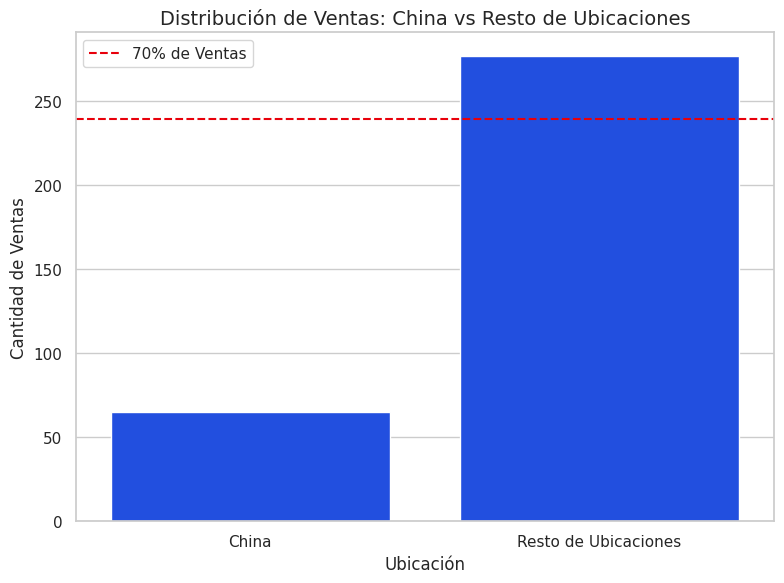

In [41]:
# Filtrar por ubicación y contar las ventas
ventas_por_ubicación = pedidos['ubicacion_geografica'].value_counts()

# Separar China y agrupar el resto como "Resto de ubicaciones"
ventas_china = ventas_por_ubicación['China']
resto_ubicación = ventas_por_ubicación.drop('China').sum()

# Crear un nuevo Series con China y el resto
ventas_agrupadas = pd.Series([ventas_china, resto_ubicación], index=['China', 'Resto de Ubicaciones'])

# Cambiar el tema de seaborn a uno más colorido
sns.set_theme(style="whitegrid", palette="bright")

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=ventas_agrupadas.index, y=ventas_agrupadas.values)
plt.title('Distribución de Ventas: China vs Resto de Ubicaciones', fontsize=14)
plt.xlabel('Ubicación', fontsize=12)
plt.ylabel('Cantidad de Ventas', fontsize=12)
plt.axhline(y=len(pedidos) * 0.7, color='r', linestyle='--', label='70% de Ventas')  # Línea de referencia 70%

plt.legend()
plt.tight_layout()
plt.show()

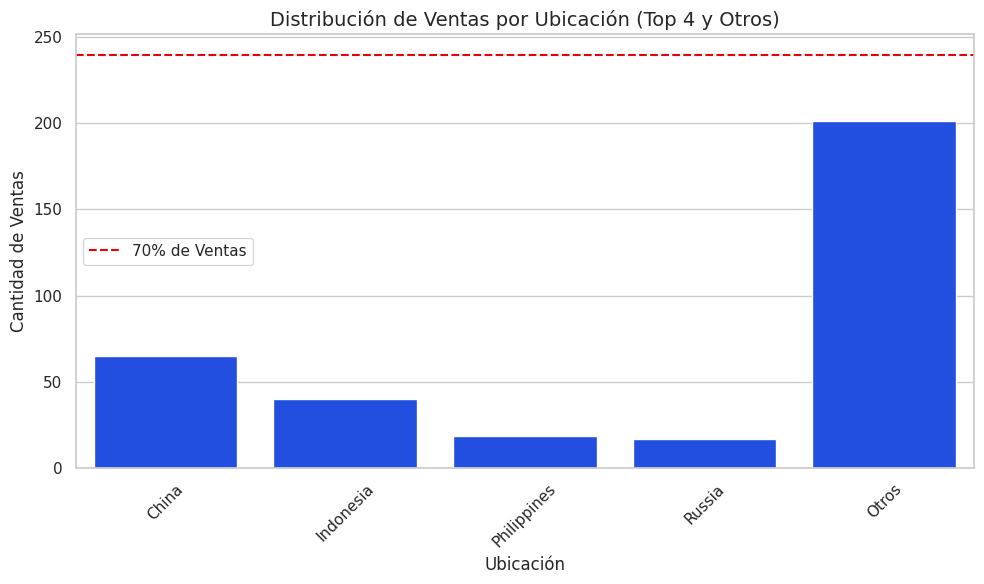

In [42]:
# Separar datos ubicación
ventas_por_ubicación = pedidos['ubicacion_geografica'].value_counts()

# Seleccionar las 5 ubicaciones con más ventas y agrupar el resto como "Otros"
top_4_ubicación = ventas_por_ubicación.head(4)
otros = pd.Series(ventas_por_ubicación[4:].sum(), index=["Otros"])

# Concatenar las 5 ubicaciones principales con "Otros"
ventas_top_4 = pd.concat([top_4_ubicación, otros])

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=ventas_top_4.index, y=ventas_top_4.values)
plt.title('Distribución de Ventas por Ubicación (Top 4 y Otros)', fontsize=14)
plt.xlabel('Ubicación', fontsize=12)
plt.ylabel('Cantidad de Ventas', fontsize=12)
plt.xticks(rotation=45)
plt.axhline(y=len(pedidos) * 0.7, color='r', linestyle='--', label='70% de Ventas')  # Línea de referencia 70%

plt.legend()
plt.tight_layout()
plt.show()

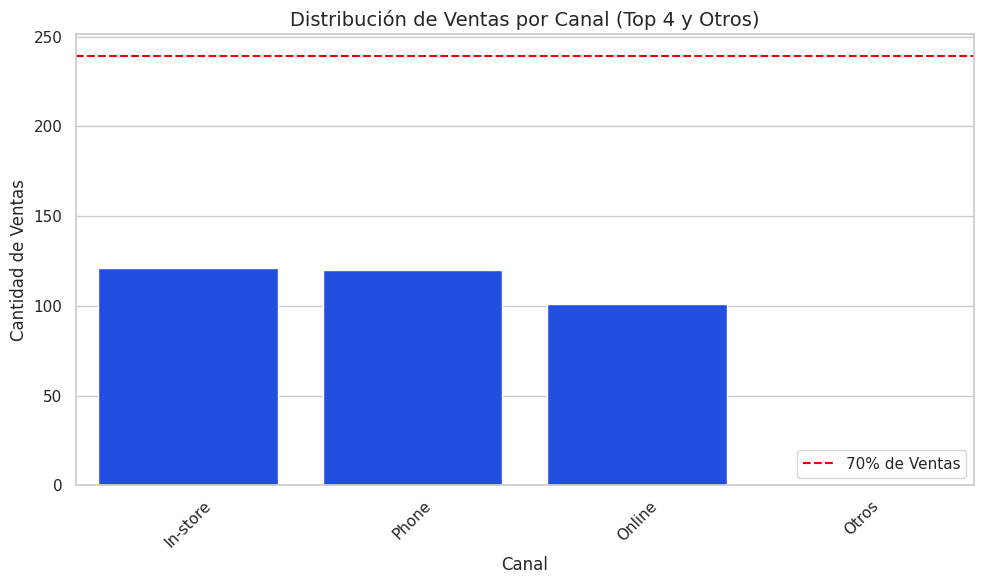

In [43]:
# Separar datos ubicación
ventas_por_canal = pedidos['canal_ventas'].value_counts()

# Seleccionar las canales con más ventas y agrupar el resto como "Otros"
top_4_canal = ventas_por_canal.head(4)
otros = pd.Series(ventas_por_canal[4:].sum(), index=["Otros"])

# Concatenar canales principales con "Otros"
ventas_top_4_canal = pd.concat([top_4_canal, otros])

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=ventas_top_4_canal.index, y=ventas_top_4_canal.values)
plt.title('Distribución de Ventas por Canal (Top 4 y Otros)', fontsize=14)
plt.xlabel('Canal', fontsize=12)
plt.ylabel('Cantidad de Ventas', fontsize=12)
plt.xticks(rotation=45)
plt.axhline(y=len(pedidos) * 0.7, color='r', linestyle='--', label='70% de Ventas')  # Línea de referencia 70%

plt.legend()
plt.tight_layout()
plt.show()

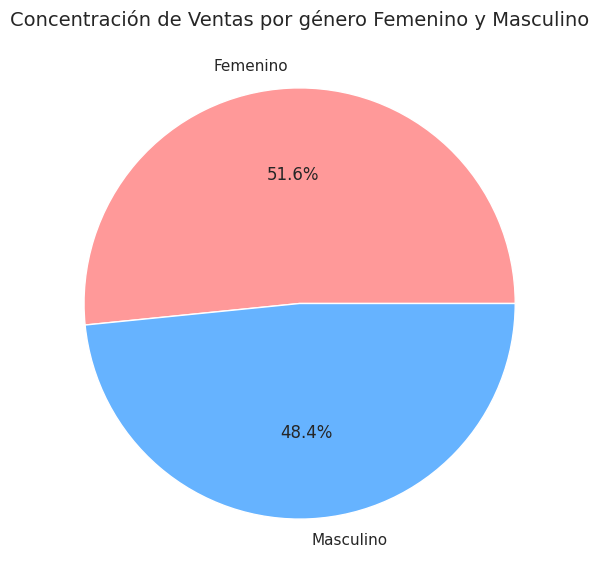

In [44]:
# Agrupar ventas por gènero femenino y masculino
ventas_por_genero = pedidos['genero'].value_counts()

# Filtrar las tiendas 1, 2 y 5 y calcular el porcentaje
grupo_genero_femenino = ventas_por_genero[['Female']].sum()
grupo_genero_masculino = ventas_por_genero[['Male']].sum()
#otras_genero = ventas_por_tienda.sum() - grupo_tiendas

# Crear el gráfico de torta
plt.figure(figsize=(7, 7))
plt.pie([grupo_genero_femenino, grupo_genero_masculino], labels=['Femenino', 'Masculino'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Concentración de Ventas por género Femenino y Masculino', fontsize=14)
plt.show()

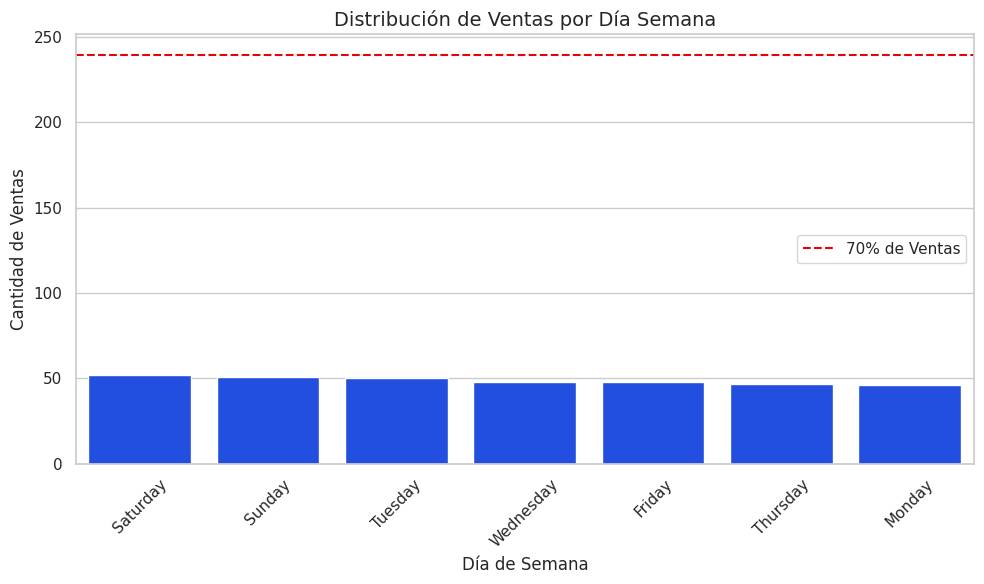

In [45]:
# Separar datos Día de la semana
ventas_por_día = pedidos['dia_semana'].value_counts()

# Seleccionar las canales con más ventas y agrupar el resto como "Otros"
top_4_dia = ventas_por_día.head(7)
# top_4_dia = ventas_por_día.sum()
otros = pd.Series(ventas_por_día[7:].sum(), index=["Otros"])

# Concatenar canales principales con "Otros"
# ventas_top_4_dia = pd.concat([top_4_dia, otros])

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=top_4_dia.index, y=top_4_dia.values)
plt.title('Distribución de Ventas por Día Semana', fontsize=14)
plt.xlabel('Día de Semana', fontsize=12)
plt.ylabel('Cantidad de Ventas', fontsize=12)
plt.xticks(rotation=45)
plt.axhline(y=len(pedidos) * 0.7, color='r', linestyle='--', label='70% de Ventas')  # Línea de referencia 70%

plt.legend()
plt.tight_layout()
plt.show()

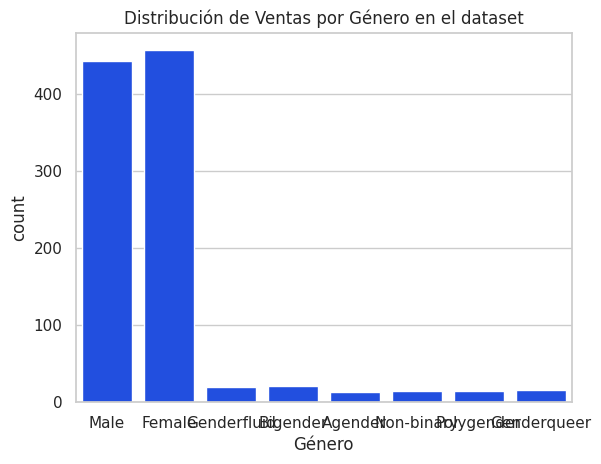

In [46]:
sns.countplot(x='Género', data=df)
plt.title('Distribución de Ventas por Género en el dataset')
plt.show()

# Machine Learning
**Supervised Learning**
Model Classification



**K-Nearest Neighbors**
Se espera idenificar entre los nuevos pacientes aquellos que tienen antecedentes familiares de sobrepeso y aquellos que no los tienen. Para lograr esto, utilizare el algoritmos de los K-veecinos más cercanos.
Este método clasificara los nueacientes en función de la similitud de características con respecto a los paicentes existentes en el conjuntos de datos importados.
De esta manera, podemos predecir si un pacientes dato tiene antecedentes familiares de sobrepeso en función de características similares de otros pacientes ya etiquetados.

In [85]:
# Desactivar advertencias
import warnings
warnings.filterwarnings("ignore")

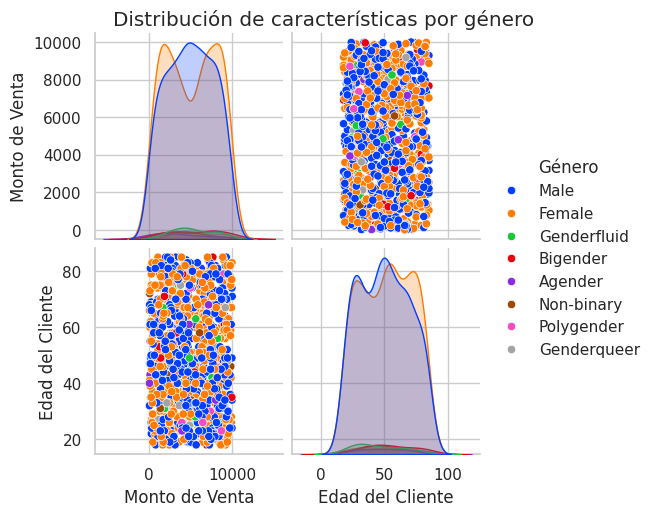

In [47]:
sns.pairplot(df, hue='Género')
plt.suptitle('Distribución de características por género', y=1.02)
plt.show()

In [86]:
# Asignamos los datos del dataframe a una nueva variable data para la utilización en este modelo
data = df

#Correlación

In [48]:
df['Género'].value_counts()#para ver balanceo sobre variable Género

,count
Género,
Female,457
Male,443
Bigender,21
Genderfluid,20
Genderqueer,16
Non-binary,15
Polygender,15
Agender,13


In [49]:
# Codificar la variable objetivo 'género' con LabelEncoder
label_encoder = LabelEncoder()#nos traemos el algoritmo
df['género_encoded'] = label_encoder.fit_transform(df['Género'])#generamos una nueva col que va a la refleje esta transformacion, sobre que columna queremos que haga esta transformacion y fit_transform

# Verificar la codificación
print(label_encoder.classes_)  # Muestra las especies y su valor codificado
print(df[['Género', 'género_encoded']].head())


['Agender' 'Bigender' 'Female' 'Genderfluid' 'Genderqueer' 'Male'
 'Non-binary' 'Polygender']
   Género  género_encoded
0    Male               5
1    Male               5
2  Female               2
3    Male               5
4  Female               2


#Modelo
Feature Selection


```
# This is formatted as code
```



In [50]:
# Preparación de datos para el modelo
df = df.drop('Género', axis=1)
X = df.drop('género_encoded', axis=1)
y = df['género_encoded']

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
# Asiganamos las variables a utilizar como features y target
X = df[["género_encoded", "Monto de Venta"]]
X.head(2)




,género_encoded,Monto de Venta
0,5,6323.96
1,5,7112.29


In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [62]:
# Crear un modelo de Regresión Logística
logreg = LogisticRegression(max_iter=200)#arbol de decision

In [63]:
# Entrenamiento del modelo con características seleccionadas
logreg.fit(X_train, y_train)

# Predicción y evaluación
y_pred = logreg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.868
Confusion Matrix:
 [[  2   3   0   0   0   0   0   0]
 [  0   0   3   0   0   0   0   0]
 [  0   0 112   0   0   0   0   0]
 [  0   0   5   0   0   0   0   0]
 [  0   0   0   0   0   7   0   0]
 [  0   0   0   0   0 103   0   0]
 [  0   0   0   0   0   6   0   0]
 [  0   0   0   0   0   9   0   0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.00      0.00      0.00         3
           2       0.93      1.00      0.97       112
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         7
           5       0.82      1.00      0.90       103
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00         9

    accuracy                           0.87       250
   macro avg       0.34      0.30      0.31       250
weighted avg       0.78      0.87      0.82       250



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Standard Features

In [55]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
Train

In [57]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Predict

In [58]:
y_pred = knn.predict(X_test)

In [59]:
y_pred

array([5, 5, 5, 2, 2, 2, 2, 5, 5, 2, 5, 2, 2, 2, 2, 2, 2, 2, 5, 4, 2, 5,
       5, 5, 5, 2, 7, 5, 5, 5, 2, 3, 2, 5, 2, 2, 5, 2, 5, 5, 5, 2, 2, 2,
       2, 2, 5, 5, 5, 2, 5, 2, 5, 5, 0, 3, 2, 5, 2, 5, 5, 2, 5, 2, 5, 2,
       5, 2, 5, 2, 1, 2, 2, 2, 5, 5, 4, 5, 2, 2, 2, 6, 2, 5, 5, 5, 6, 2,
       2, 2, 2, 3, 2, 5, 2, 1, 2, 2, 2, 5, 5, 2, 5, 2, 5, 5, 2, 5, 6, 5,
       5, 2, 4, 2, 2, 5, 2, 5, 3, 5, 5, 2, 5, 2, 2, 2, 5, 2, 2, 2, 2, 5,
       5, 2, 5, 2, 5, 5, 2, 7, 1, 2, 2, 2, 2, 2, 2, 2, 5, 2, 6, 5, 2, 5,
       2, 5, 4, 5, 2, 2, 2, 2, 2, 6, 2, 2, 2, 5, 5, 5, 2, 5, 2, 2, 5, 5,
       5, 5, 2, 5, 5, 5, 3, 5, 6, 5, 2, 5, 5, 2, 1, 2, 6, 5, 2, 5, 5, 5,
       2, 0, 5, 5, 5, 5, 2, 2, 5, 2, 6, 6, 5, 2, 5, 5, 2, 2, 5, 2, 5, 5,
       5, 2, 2, 2, 2, 5, 2, 5, 7, 5, 5, 5, 2, 2, 5, 2, 0, 5, 2, 5, 5, 5,
       2, 2, 4, 4, 6, 5, 5, 1])

Accuracy

In [107]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.868


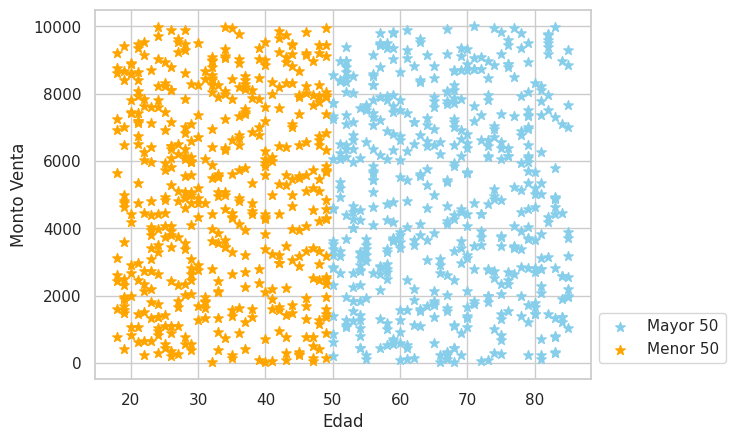

In [106]:
# Filtramos los datos del df data que presentan por edades y montos
mayor_50_data = data[data["Edad del Cliente"]>=50]
menor__data = data[data["Edad del Cliente"]<50]

# Utilizamos el método scatter para hacer un gráfico de dispersi
plt.scatter(mayor_50_data["Edad del Cliente"], mayor_50_data["Monto de Venta"],
            marker="*", s=50, color="skyblue",
            label="Mayor 50")

plt.scatter(menor__data["Edad del Cliente"], menor__data["Monto de Venta"],
            marker="*", s=50, color="orange",
            label="Menor 50")

plt.ylabel("Monto Venta")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.2))
plt.show()

**Conclusiones**

El modelo de clasificación K-NN demóstro tener una precisión del 86.8% considerandose como un rendimiento alto en la predicción de la variable relacionada a edades, genero y ventas.

Esto hace dar cuneta de que la edad, genero y el monto de la venta son indicadores significativos para dimensionar promociones de ventas.

Se desidio utilizar este modelo para identificar edades que determinen donde esta la mayor segmento de generacion de ventas.  

A modo de conclusión, el modelo de clasificación presentado K-NN nos ofrece una herramienta prometedora para comprender y abordar segmentos de venta segun edad y genero. Este metodo nos da una base para respaldar acciones de venta.

